<a href="https://colab.research.google.com/github/shahdevansh28/CE122_Shah_Devansh_ML/blob/main/ML_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

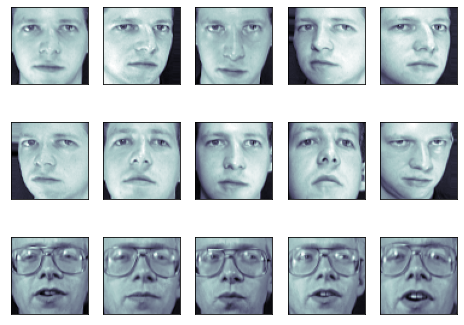

In [ ]:
from sklearn import datasets
from matplotlib import pyplot as plt
faces = datasets.fetch_olivetti_faces()
# print(faces.data.shape)

fig = plt.figure(figsize=(8,6))

for i in range(15):
  ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
  ax.imshow(faces.images[i],cmap=plt.cm.bone)


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(faces.data,faces.target,random_state=0)


print(X_test.shape,X_train.shape)

(100, 4096) (300, 4096)


(150, 4096)


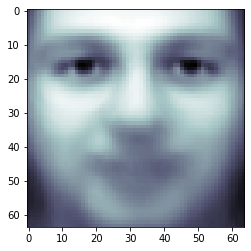

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 150,whiten=True)

pca.fit(X_train)

plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

# print(pca.components_.shape)

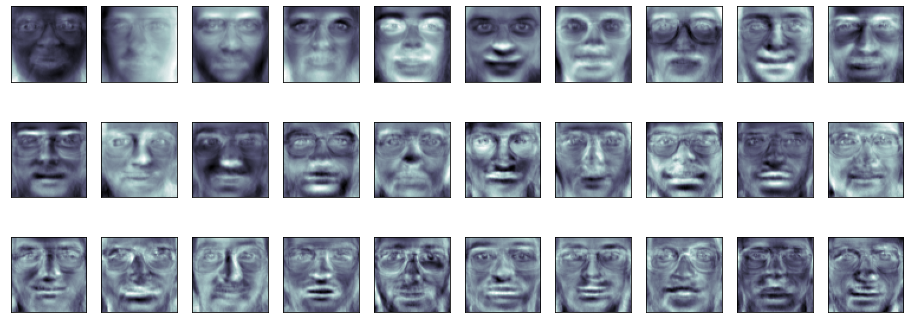

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [ ]:
print(X_test_pca.shape)

(100, 150)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, Y_train)

GaussianNB()

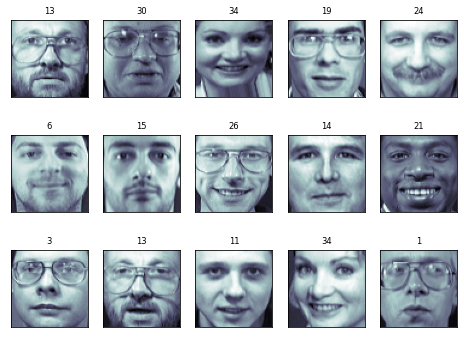

In [ ]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == Y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [ ]:
from sklearn import metrics

y_pred = gnb.predict(X_test_pca)

print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.67      1.00      0.80         2
           3       0.10      1.00      0.18         1
           4       1.00      1.00      1.00         1
           5       1.00      0.60      0.75         5
           6       0.80      1.00      0.89         4
           7       1.00      0.67      0.80         3
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.60      1.00      0.75         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
print(metrics.confusion_matrix(Y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


Exercise

In [ ]:
#1.
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(faces.data,faces.target,random_state=0)


print(X_test.shape,X_train.shape)


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)


from sklearn import metrics

y_pred = gnb.predict(X_test)

print(metrics.classification_report(Y_test,y_pred))

(100, 4096) (300, 4096)
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      0.50      0.67         4
           2       0.50      0.50      0.50         2
           3       0.17      1.00      0.29         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       0.14      1.00      0.25         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 2)


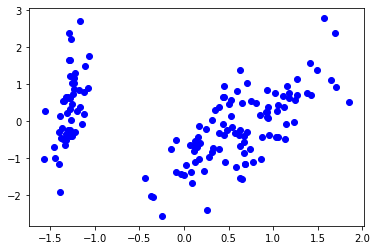

In [ ]:
#2
from sklearn import datasets

iris = datasets.load_iris()

print(iris.feature_names)

from sklearn import decomposition

pca = decomposition.PCA(n_components = 2,whiten=True).fit_transform(iris.data)

print(pca.shape)

ax = plt.plot(pca[:,0],pca[:,1],'bo')
 

In [ ]:
#3
from sklearn import datasets

iris = datasets.load_iris()

print(iris.feature_names)

X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,random_state=0)


from sklearn import decomposition

pca = decomposition.PCA(n_components = 2,whiten=True)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
print(X_train_pca)


from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb2 = GaussianNB()
gnb2.fit(X_train_pca, Y_train)

y_pred = gnb2.predict(X_test_pca)

print(metrics.classification_report(Y_test,y_pred))

print(metrics.confusion_matrix(Y_test,y_pred))
# ax = plt.plot(pca[:,0],pca[:,1],'bo')

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 0.21392968 -0.25204477]
 [ 0.076927   -0.85900531]
 [ 1.001026    0.29683095]
 [-1.39755604 -0.17716495]
 [ 0.88840728  0.68844281]
 [-1.16436807  0.47589432]
 [-1.20772744  1.37195688]
 [-0.28265726 -2.54202092]
 [ 0.89644183 -0.03042903]
 [ 1.12251686  0.489407  ]
 [ 0.57964456 -1.62622339]
 [ 1.06886453 -0.64471002]
 [-0.01296784 -1.20609621]
 [ 1.4376603   1.1643782 ]
 [ 0.4945698   0.49742086]
 [-0.06800128 -1.44410044]
 [ 0.62816338 -0.50966611]
 [ 0.65463082 -0.38708868]
 [ 0.20632244 -2.38870274]
 [ 0.69181495 -0.86271351]
 [ 0.58854756  1.24767664]
 [ 0.80946806  0.04954486]
 [ 0.35722774  0.34857562]
 [-1.25555374 -0.31378662]
 [ 0.63666629 -1.22016332]
 [ 0.13580311 -1.04603137]
 [-0.11252253 -0.52413798]
 [ 0.0435757  -1.39771482]
 [ 0.39394351 -0.13542385]
 [ 1.21672371  0.95675394]
 [-1.22556692  1.24763186]
 [-1.5603238  -0.8865851 ]
 [ 0.82438156 -0.54784693]
 [ 0.12718499 -0.45497973]

In [ ]:
#4
from sklearn import datasets

iris = datasets.load_iris()

print(iris.feature_names)

X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,random_state=0)


from sklearn import decomposition

pca = decomposition.PCA(n_components = 2,whiten=True)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
print(X_train_pca)


from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train)

y_pred = model.predict(X_test_pca)

print(metrics.classification_report(Y_test,y_pred))

print(metrics.confusion_matrix(Y_test,y_pred))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 0.21392968 -0.25204477]
 [ 0.076927   -0.85900531]
 [ 1.001026    0.29683095]
 [-1.39755604 -0.17716495]
 [ 0.88840728  0.68844281]
 [-1.16436807  0.47589432]
 [-1.20772744  1.37195688]
 [-0.28265726 -2.54202092]
 [ 0.89644183 -0.03042903]
 [ 1.12251686  0.489407  ]
 [ 0.57964456 -1.62622339]
 [ 1.06886453 -0.64471002]
 [-0.01296784 -1.20609621]
 [ 1.4376603   1.1643782 ]
 [ 0.4945698   0.49742086]
 [-0.06800128 -1.44410044]
 [ 0.62816338 -0.50966611]
 [ 0.65463082 -0.38708868]
 [ 0.20632244 -2.38870274]
 [ 0.69181495 -0.86271351]
 [ 0.58854756  1.24767664]
 [ 0.80946806  0.04954486]
 [ 0.35722774  0.34857562]
 [-1.25555374 -0.31378662]
 [ 0.63666629 -1.22016332]
 [ 0.13580311 -1.04603137]
 [-0.11252253 -0.52413798]
 [ 0.0435757  -1.39771482]
 [ 0.39394351 -0.13542385]
 [ 1.21672371  0.95675394]
 [-1.22556692  1.24763186]
 [-1.5603238  -0.8865851 ]
 [ 0.82438156 -0.54784693]
 [ 0.12718499 -0.45497973]